# Импорт

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc

from joblib import dump


# Загружаем датасет и разбиваем её на выборку.

In [30]:
models = pd.read_csv('../Data/DataLaba2/neo_task_smoted.csv')
X_train, X_test, y_train, y_test = train_test_split(models.drop('hazardous', axis=1), models['hazardous'], test_size=0.25, random_state=42)


# Создание модели

In [31]:
model_class = tf.keras.models.Sequential()
model_class.add(tf.keras.layers.Dense(6, activation='relu', input_shape=(X_train.shape[1],), name='input'))
model_class.add(tf.keras.layers.Dense(3, activation='relu', name='hidden_layer_2'))
model_class.add(tf.keras.layers.Dense(2, name='output'))
model_class.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 6)                 30        
                                                                 
 hidden_layer_2 (Dense)      (None, 3)                 21        
                                                                 
 output (Dense)              (None, 2)                 8         
                                                                 
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_coder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1,)
])


## Компиляция

In [33]:
model_coder.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mean_absolute_error']
)


# Обучение

In [34]:
model_coder.fit(
    X_train,
    y_train,
    validation_split=0.5,
    epochs=5,
    batch_size=20
)


Epoch 1/5
3075/3075 [==============================] - 10s 3ms/step - loss: 0.1757 - mean_absolute_error: 0.3502 - val_loss: 0.1497 - val_mean_absolute_error: 0.3267
Epoch 2/5
3075/3075 [==============================] - 9s 3ms/step - loss: 0.1482 - mean_absolute_error: 0.3249 - val_loss: 0.1498 - val_mean_absolute_error: 0.3257
Epoch 3/5
3075/3075 [==============================] - 9s 3ms/step - loss: 0.1482 - mean_absolute_error: 0.3247 - val_loss: 0.1497 - val_mean_absolute_error: 0.3273
Epoch 4/5
3075/3075 [==============================] - 9s 3ms/step - loss: 0.1482 - mean_absolute_error: 0.3248 - val_loss: 0.1496 - val_mean_absolute_error: 0.3270
Epoch 5/5
3075/3075 [==============================] - 9s 3ms/step - loss: 0.1481 - mean_absolute_error: 0.3247 - val_loss: 0.1494 - val_mean_absolute_error: 0.3256


# Predict

In [40]:
y_predicted = model_coder.predict(X_test).T[0]


1282/1282 [==============================] - 2s 2ms/step


In [39]:
y_predicted


array([0.7973768 , 0.34785348, 0.52603453, ..., 0.3331228 , 0.7155223 ,
       0.4423653 ], dtype=float32)

# Оценка качества 

In [42]:
print('Accuracy')
print(accuracy_score(y_test, y_predicted>0.5))


Accuracy
0.8506024684130933


In [43]:
print('Confusion matrix')
print(confusion_matrix(y_test, y_predicted > 0.5))


Confusion matrix
[[15210  5164]
 [  961 19663]]


In [44]:
print('Precision, Recall, F\n', classification_report(y_test, y_predicted > 0.5))


Precision, Recall, F
               precision    recall  f1-score   support

         0.0       0.94      0.75      0.83     20374
         1.0       0.79      0.95      0.87     20624

    accuracy                           0.85     40998
   macro avg       0.87      0.85      0.85     40998
weighted avg       0.87      0.85      0.85     40998



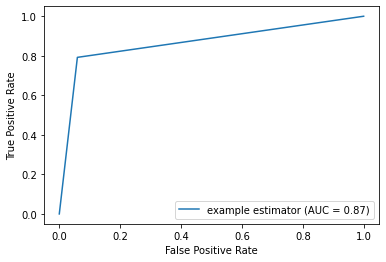

In [45]:
fpr, tpr, thresholds = roc_curve(y_predicted > 0.5, y_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()